# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [47]:
# Counting observations in dataframe
df_raw.count()

# Checking for missing values in dataframe
df_raw.isnull().values.any()

True

Answer: 400 in total however there are missing values in the dataset

#### Question 2. Create a summary table

In [7]:
#function
# Having a quick look at data with descriptive statistics 
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [12]:
# More exploratory analysis (addition)
df_raw.sum()

admit          127.00
gre         234040.00
gpa           1349.59
prestige       992.00
dtype: float64

In [13]:
# More exploratory analysis (correlation)
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [14]:
# More exploratory analysis (skewness)  
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [48]:
# More exploratory analysis (Kurtosis)  
df_raw.kurt()



admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162230F2A58>,
      dtype=object)

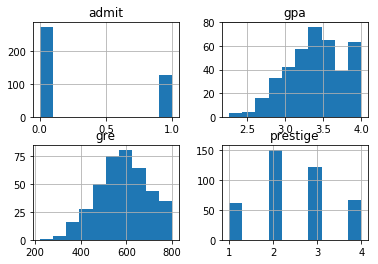

In [23]:
# Plotting data to see how data is distributed
df_raw.hist()

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Both GRE and GPA have missing values. GRE's mean is slightly higher than its median which means that the distribution is asimetrical.
Both GRE and GPA show slightly negative skewness and Kurtosis but this is higher for GRE meaning that statistics like the STD will be sweked.

#### Question 4. Drop data points with missing data


In [77]:
# Dropping NANs point and assigning to new dataframe

df_cleaned = df_raw.dropna()

# Checking the missing values are gone

df_cleaned.describe()
df_cleaned.isnull().values.any()

False

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: My total counts for each column are the same and I checked no missing values are left in the dataset (df_cleaned.isnull().values.any() = False)

#### Question 6. Create box plots for GRE and GPA

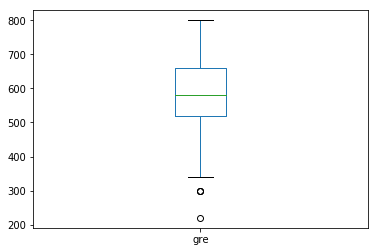

In [82]:
#boxplot 1 (GRE)

df_cleaned['gre'].plot(kind='box')

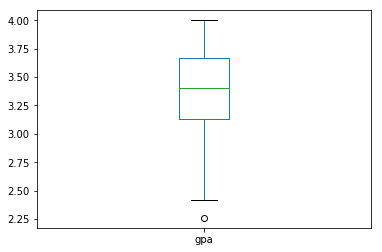

In [91]:
#boxplot 2 (gpa)

df_cleaned['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: Box plots show the distribution of a dataset (sample or population) by ordering, ranking and representing data into four quartiles. GRE box plot shows a degree of (positive) skewness while GPA box plot shows that the bottom range (quartile 1) values strech much futher in the range than the top of the range (quartile 3) Both box plots show outliers.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001622706FA58>,
      dtype=object)

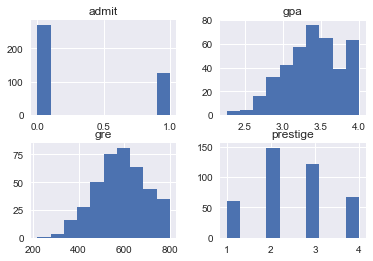

In [125]:
# plot the distribution of each variable 

df_cleaned.hist()

# compare with density plot (smooth version of a histogram)

#df_cleaned['admit'].plot(kind='density')
#df_cleaned['gpa'].hist()
#df_cleaned['gpa'].plot(kind='density')
#df_cleaned['gre'].plot(kind='density')
#df_cleaned['prestige'].plot(kind='density')


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No because we have stablished that gpa and gre datasets are asimetrical and therefore they are not normally distributed. We still need to remove outliers and if the mean still skewed we could look into a work around as using the Median Absolute Deviation (MAD) instead of Standard Deviation to guide our analysis

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, as explained we need to look closer at values, remove outliers, collect more data if possible and consider other statistics more robust than the mean and probably apply other type of analysis due to skewness and Kurtosis found.

#### Question 11. Which of our variables are potentially colinear? 

In [127]:
# create a correlation matrix for the data
df_cleaned.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA show the highest positive correlation (Corr = 0.38) The rest of variables show lower correlations or negative correlations

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1.Write the hyphoteses. Null hypothesis (This is the hypothesis based on chance) and the alternative hypothesis(This is the hypothesis that shows a change from the null hypothesis that is caused by something)

2.Create an analysis plan. This involves deciding how to read your results to know whether your null hypothesis is true or your alternative hypothesis is true. There are two ways to read your results: P-value method and the region of acceptance method. 

3.Analysing the data. The data is analysed and either a P-value is found or the data's region is found.

4.Interpretation. This is when results are interpreted. The data is compared to the region of acceptance or the significance level. If the P-value is less than the significance region then the Null hypothesis is not valid. 
The fact that the Null hypothesis is not valid doesn't mean that the alternative hypothesis is valid.

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis: There is no relationship between grad school admissions and prestige of undergraduate schools.

Alternative hypothesis:  There is a relationship grad school admissions and prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [141]:
#df_raw.describe()

#Drop the rows where at least one element is missing
df_raw.dropna()

#Drop the columns where at least one element is missing
df_raw.dropna(axis='columns')

#Drop the rows where all elements are missing.
df_raw.dropna(how='all')

#Keep only the rows with at least 2 non-NA values
df_raw.dropna(thresh=2)

#Define in which columns to look for missing values
df_raw.dropna(subset=['gre', 'gpa'])

#### 2. Bonus: Log transform the skewed data

C:\Users\loida\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


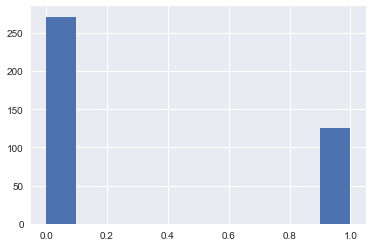

In [158]:

#df_raw['gre'].apply(np.log).hist()
#plt.show()

log_data = np.log(df_cleaned['admit'])
df_cleaned['admit'].hist()


#### 3. Advanced: Impute missing data

In [169]:
#Fill the missing data field with the median of it’s respective column
df_median = df_raw.fillna(df_raw.median())
df_median.describe()

#Fill the missing data field with the mean of it’s respective column
df_mean = df_raw.fillna(df_raw.mean())
df_mean.describe()

#Keep the DataFrame with valid entries in the same variable
df_raw.dropna(inplace=True)

# mark zero values as missing or NaN
df_mean1 = df_mean.replace(0, np.NaN)
df_mean.describe()
df_mean.isnull().values.any()

# count the number of NaN values in each column
#print(df_mean.isnull().sum())
df_mean.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000
